In [1]:
class Custom_Statistics:
    def __init__(self, data):
        self.data = data

    def ct_arithmetic_mean(self):
        return sum(self.data) / len(self.data)

    def ct_geometric_mean(self):
        product = 1
        for value in self.data:
            product *= value
        return product ** (1 / len(self.data))

    def ct_harmonic_mean(self):
        return len(self.data) / sum(1 / value for value in self.data)

    def ct_mode(self):
        frequency_dict = {}
        for value in self.data:
            frequency_dict[value] = frequency_dict.get(value, 0) + 1

        modes = [key for key, value in frequency_dict.items() if value == max(frequency_dict.values())]

        return modes if modes else None

    def ct_median(self):
        sorted_data = sorted(self.data)
        n = len(sorted_data)
        middle = n // 2

        if n % 2 == 0:
            return (sorted_data[middle - 1] + sorted_data[middle]) / 2
        else:
            return sorted_data[middle]

    def ct_describe(self):
        n = len(self.data)
        if n == 0:
            return None

        mean_val = self.ct_arithmetic_mean()
        std_dev_val = self.ct_standard_deviation()
        min_val = self.ct_min_value()
        q1, q2, q3 = self.ct_quartiles()
        max_val = self.ct_max_value()

        return {
            'count': n,
            'mean': mean_val,
            'std': std_dev_val,
            'min': min_val,
            '25%': q1,
            '50%': q2,
            '75%': q3,
            'max': max_val
        }

    def ct_variance(self):
        mean = self.ct_arithmetic_mean()
        return sum((value - mean) ** 2 for value in self.data) / len(self.data)

    def ct_standard_deviation(self):
        return self.ct_variance() ** 0.5

    def ct_max_value(self):
        return max(self.data)

    def ct_min_value(self):
        return min(self.data)

    def ct_range(self):
        return self.ct_max_value() - self.ct_min_value()

    def ct_iqr(self):
        q1, _, q3 = self.ct_quartiles()
        return q3 - q1 if q1 is not None and q3 is not None else None

    def ct_quartiles(self):
        sorted_data = sorted(self.data)
        n = len(sorted_data)

        q1_index = (n + 1) // 4
        q2_index = (2 * (n + 1)) // 4
        q3_index = (3 * (n + 1)) // 4

        q1 = sorted_data[q1_index - 1] + (sorted_data[q1_index] - sorted_data[q1_index - 1]) * ((n + 1) % 4) / 4
        q2 = sorted_data[q2_index - 1] + (sorted_data[q2_index] - sorted_data[q2_index - 1]) * ((n + 1) % 4) / 4
        q3 = sorted_data[q3_index - 1] + (sorted_data[q3_index] - sorted_data[q3_index - 1]) * ((n + 1) % 4) / 4

        return q1, q2, q3

    def ct_coefficient_of_range(self):
        return self.ct_range() / (self.ct_max_value() + self.ct_min_value())

    def ct_coefficient_of_variation(self):
        return (self.ct_standard_deviation() / self.ct_arithmetic_mean()) * 100

    def ct_coefficient_of_standard_deviation(self):
        return self.ct_standard_deviation() / self.ct_arithmetic_mean()

    def ct_coefficient_of_quartile_deviation(self):
        iqr_value = self.ct_iqr()
        median_value = self.ct_median()

        return (iqr_value / median_value) * 100 if iqr_value is not None and median_value is not None and median_value != 0 else None

    def ct_coefficient_of_mean_deviation(self):
        mean = self.ct_arithmetic_mean()
        return (sum(abs(value - mean) for value in self.data) / len(self.data)) / mean
    
    def ct_covariance(self, other_data):
        if len(self.data) != len(other_data):
            raise ValueError("Data sets must have the same length for covariance calculation")
        mean_self = self.ct_arithmetic_mean()
        mean_other = Custom_Statistics(other_data).ct_arithmetic_mean()

        covariance = sum((x - mean_self) * (y - mean_other) for x, y in zip(self.data, other_data)) / len(self.data)
        return covariance

    def ct_pearsons_correlation(self, other_data):
        if len(self.data) != len(other_data):
            raise ValueError("Data sets must have the same length for Pearson's correlation calculation")
        covariance = self.ct_covariance(other_data)
        std_dev_self = self.ct_standard_deviation()
        std_dev_other = Custom_Statistics(other_data).ct_standard_deviation()

        correlation = covariance / (std_dev_self * std_dev_other)
        return correlation

    def ct_spearmans_rank_correlation(self, other_data):
        if len(self.data) != len(other_data):
            raise ValueError("Data sets must have the same length for Spearman's rank correlation calculation")

        # Rank the data
        ranked_self = self._rank_data(self.data)
        ranked_other = self._rank_data(other_data)

        # Calculate Pearson's correlation on the ranks
        return Custom_Statistics(ranked_self).ct_pearsons_correlation(ranked_other)

    def _rank_data(self, data):
        # Helper function to rank the data
        ranked_data = {value: i + 1 for i, value in enumerate(sorted(data))}
        return [ranked_data[value] for value in data]

## Explanations with the formulas for each statistical measure used in your `Custom_Statistics` class:

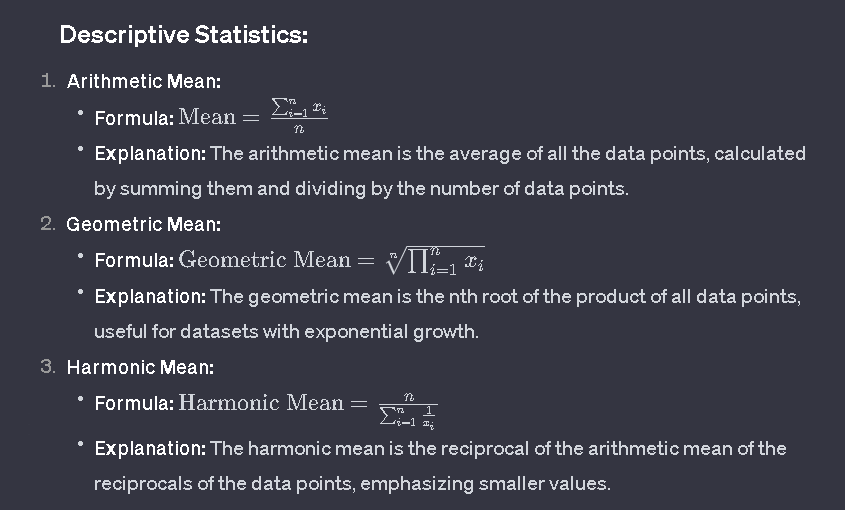

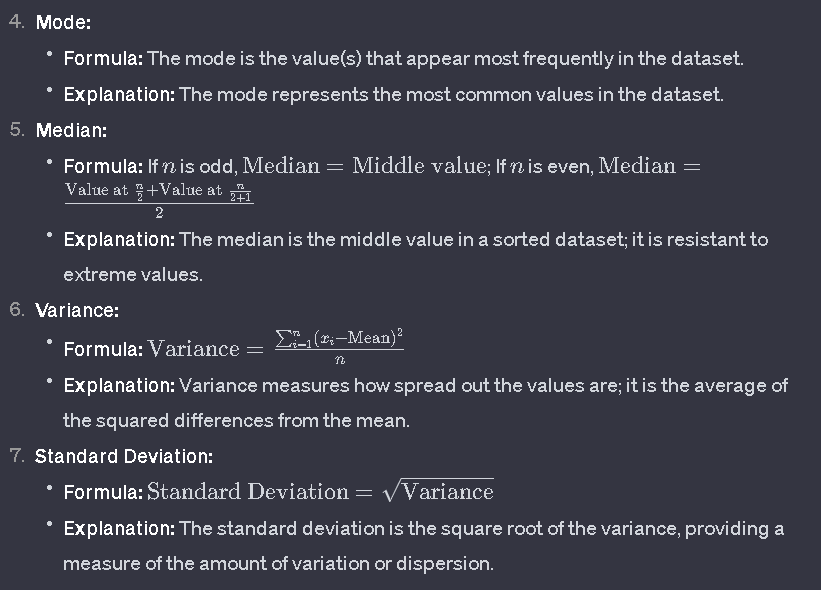

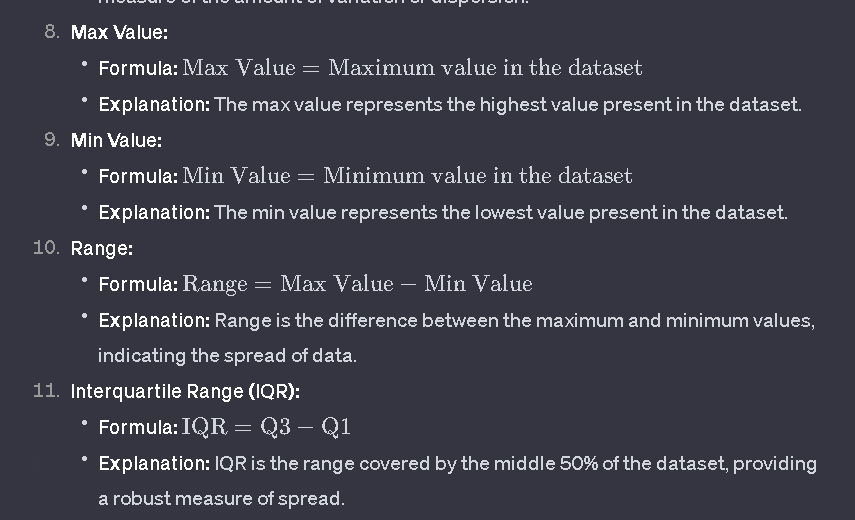

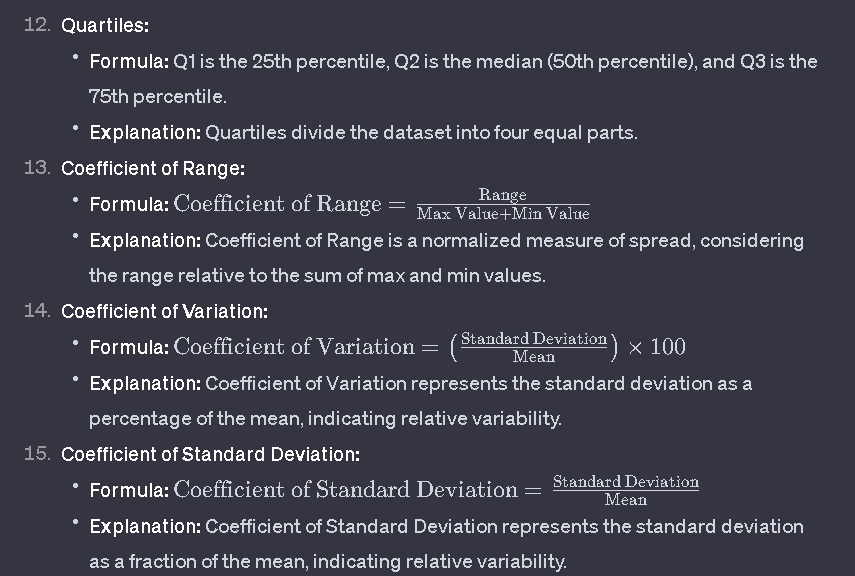

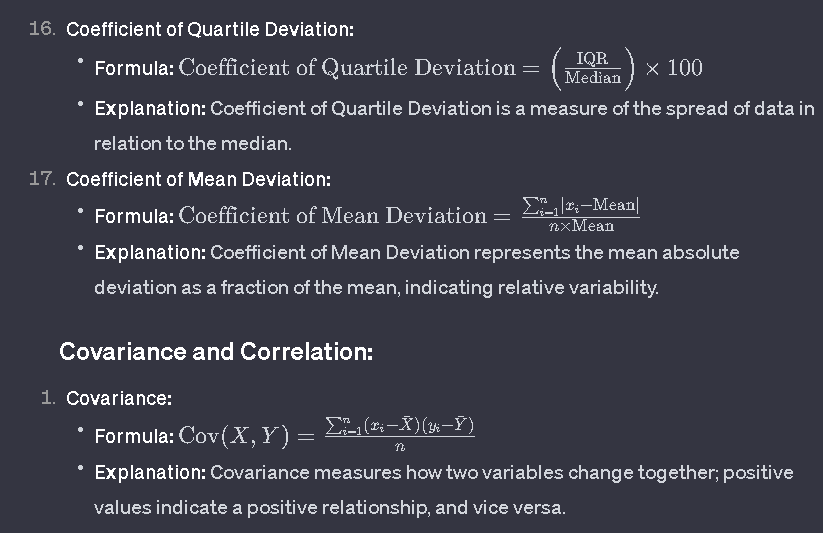

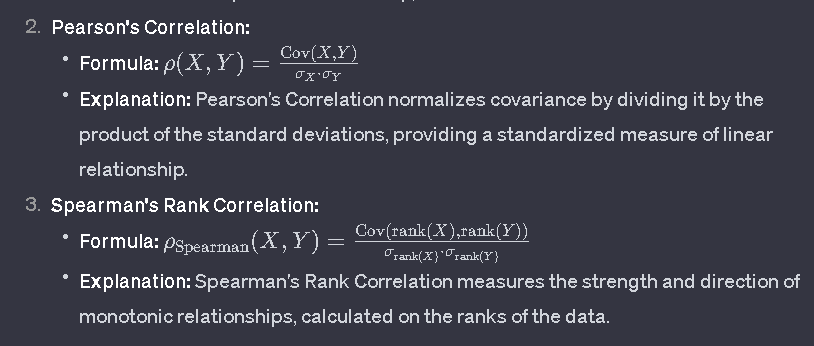

## These formulas and explanations provide a comprehensive understanding of the statistical measures used to describe, summarize, and analyze datasets.

In [2]:
import statistics_module, pandas as pd

from statistics_module import Custom_Statistics

iris_df = pd.read_csv(r"C:\Users\shiva\Desktop\Shiva M\Python\Python 19102023\Iris.csv")

column_to_analyze = 'SepalLengthCm' 

iris_data = iris_df[column_to_analyze]

iris_statistics = Custom_Statistics(iris_data)

# Example usage
print("Arithmetic Mean:", iris_statistics.ct_arithmetic_mean())
print("Geometric Mean:", iris_statistics.ct_geometric_mean())
print("Harmonic Mean:", iris_statistics.ct_harmonic_mean())
print("Mode:", iris_statistics.ct_mode())
print("Median:", iris_statistics.ct_median())
print("Describe:", iris_statistics.ct_describe())
print("Variance:", iris_statistics.ct_variance())
print("Standard Deviation:", iris_statistics.ct_standard_deviation())
print("Max Value:", iris_statistics.ct_max_value())
print("Min Value:", iris_statistics.ct_min_value())
print("Range:", iris_statistics.ct_range())
print("IQR:", iris_statistics.ct_iqr())
print("Quartiles:", iris_statistics.ct_quartiles())
print("Coefficient of Range:", iris_statistics.ct_coefficient_of_range())
print("Coefficient of Variation:", iris_statistics.ct_coefficient_of_variation())
print("Coefficient of Standard Deviation:", iris_statistics.ct_coefficient_of_standard_deviation())
print("Coefficient of Quartile Deviation:", iris_statistics.ct_coefficient_of_quartile_deviation())
print("Coefficient of Mean Deviation:", iris_statistics.ct_coefficient_of_mean_deviation())

# Covariance with another column (e.g., SepalWidthCm)
other_column = 'SepalWidthCm'
other_data = iris_df[other_column]
print(f"Covariance with {other_column}:", iris_statistics.ct_covariance(other_data))

# Pearson's correlation with another column
print(f"Pearson's correlation with {other_column}:", iris_statistics.ct_pearsons_correlation(other_data))

# Spearman's rank correlation with another column
print(f"Spearman's rank correlation with {other_column}:", iris_statistics.ct_spearmans_rank_correlation(other_data))

Arithmetic Mean: 5.843333333333335
Geometric Mean: 5.785720390427729
Harmonic Mean: 5.728905057850834
Mode: [5.0]
Median: 5.8
Describe: {'count': 150, 'mean': 5.843333333333335, 'std': 0.8253012917851409, 'min': 4.3, '25%': 5.1, '50%': 5.8, '75%': 6.4, 'max': 7.9}
Variance: 0.6811222222222222
Standard Deviation: 0.8253012917851409
Max Value: 7.9
Min Value: 4.3
Range: 3.6000000000000005
IQR: 1.3000000000000007
Quartiles: (5.1, 5.8, 6.4)
Coefficient of Range: 0.2950819672131148
Coefficient of Variation: 14.12380989934639
Coefficient of Standard Deviation: 0.1412380989934639
Coefficient of Quartile Deviation: 22.413793103448292
Coefficient of Mean Deviation: 0.11766495531469869
Covariance with SepalWidthCm: -0.03900666666666667
Pearson's correlation with SepalWidthCm: -0.10936924995064935
Spearman's rank correlation with SepalWidthCm: -0.14672017927593187
